In [52]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

# Ejercicio 1

## Ejercicio 1.a

In [53]:
modulo = 2**32
multiplicador = 1013904223
incremento = 1664525

semilla = (101503+103856+104258+102995)/4

In [54]:
print("Modulo: "+ str(modulo) )
print("Multiplicador: "+ str(modulo) )
print("Incremento: "+ str(incremento) )
print("Semilla: "+ str(semilla) )

Modulo: 4294967296
Multiplicador: 4294967296
Incremento: 1664525
Semilla: 103153.0


### Nuestra funcion de GCL quedaria como

X<sub>(i+1)</sub> = ( X<sub>(i)</sub> * Multiplicador + Incremento ) % modulo

In [55]:
lista = []
listaRepetidos = []

x = semilla

periodo = 0

"""Busco hasta la primera repeticion"""
while x not in lista:
    lista.append(x)
    x = (x * multiplicador + incremento) % modulo
    periodo += 1

    
print("Cantidad de numeros entre semilla y periodo es de "+ str(periodo) )

Cantidad de numeros entre semilla y periodo es de 12876


In [56]:
"""Veo cuantos numero hay hasta la repeticion devuelta"""
periodo = 0

while x not in listaRepetidos:
    listaRepetidos.append(x)
    x = (x * multiplicador + incremento) % modulo
    periodo += 1
    
print("El periodo es de "+ str(periodo) )

El periodo es de 9526


## Ejercicio 1.b

Para que nuestro GCL devuelva numero entre 0 y 1 podemos dividir por el modulo, normalizando el numero obtenido.

X<sub>(i+1)</sub> = ( X<sub>(i)</sub> * Multiplicador + Incremento ) % modulo

X<sub>(i+1)</sub> = X<sub>(i+1)</sub>  / modulo

In [57]:
x = semilla

for i in range(10):
    x = (x * multiplicador + incremento) % modulo
    print(x/modulo)

0.11999037768691778
0.6565184593200684
0.38245856761932373
0.832150936126709
0.3126610517501831
0.7375197410583496
0.0053147077560424805
0.638249876908958
0.527610182762146
0.4007291793823242


## Ejercicio 1.c

In [58]:
""" 
n es la cantidad de numeros a generar

Devuelve una lista con n numeros generados random
"""
def generarRandom(n):
    x = semilla
    result = []
    for i in range(n):
        result.append(x)
        x = (x * multiplicador + incremento) % modulo
    return result

def generarRandomNormalizada(n):
    x = semilla
    result = []
    for i in range(n):
        result.append(x/modulo)
        x = (x * multiplicador + incremento) % modulo
    return result

Generaremos numeros del 0 al 9 con los numeros obtenidos

In [59]:
N = generarRandom(12876)

x,y = np.array_split(N,2) # Divido el array en dos

(0.0, 1000000000.0)

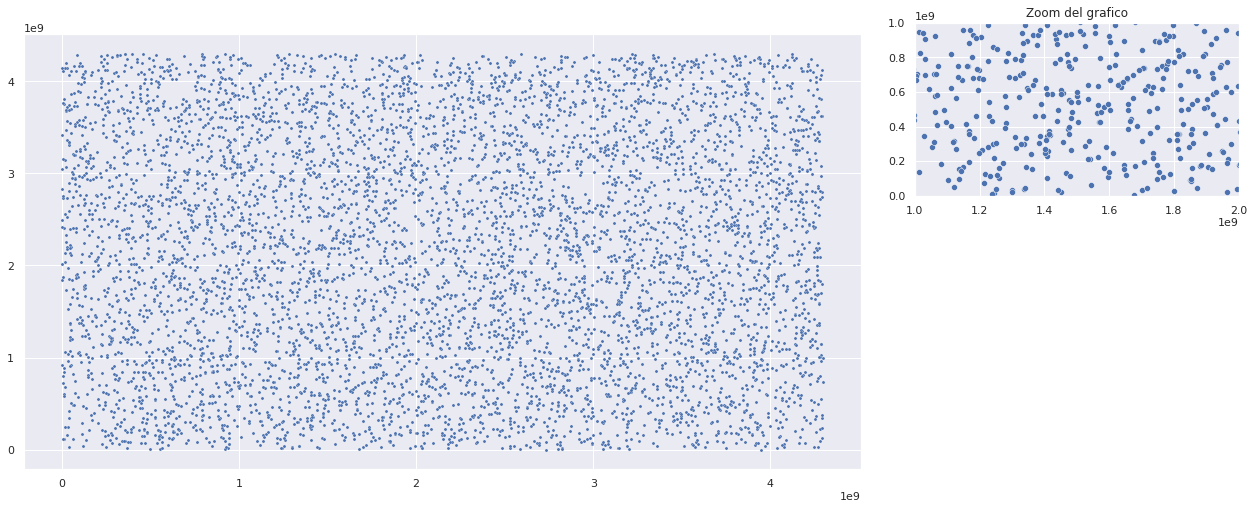

In [60]:
plt.figure(figsize=(15, 8))
ax = sns.scatterplot( x=x , y=y , s = 10 )

ax2 = plt.axes([0.95, 0.6, .3, .3])
sns.set_theme()

sns.scatterplot( x=x, y=y )
ax2.set_title('Zoom del grafico')
ax2.set_xlim([1e9,2e9])
ax2.set_ylim([0e9,1e9])

Podemos decir que es lo que esperabamos, ya que estan todos los puntos distribuidos en todo el plano.

Al verlos en el zoom, podemos ver que se generan lineas paralelas esto podria llegar a no ser una distribucion uniforme por mas de que los puntos esten distribuidos

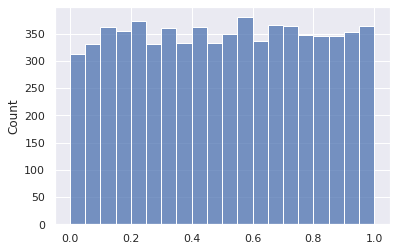

In [69]:
N = generarRandomNormalizada(7000)
sns.histplot(N)

Al hacer el histograma de los puntos normalizados, podemos ver que no hay muchas fluctaciones, la mayoria de los bins estan con la cuenta por 500. Parece que nuestro GCL es uniforme, por como es su distribucion

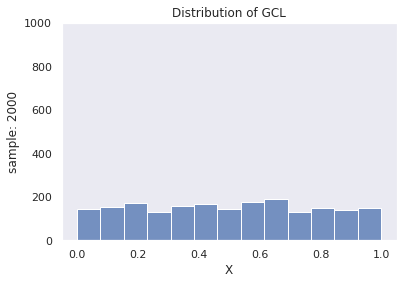

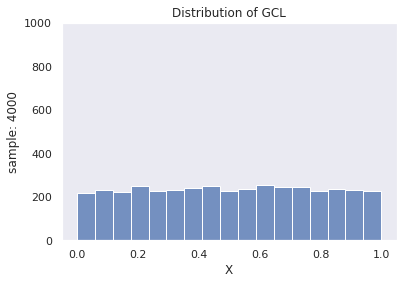

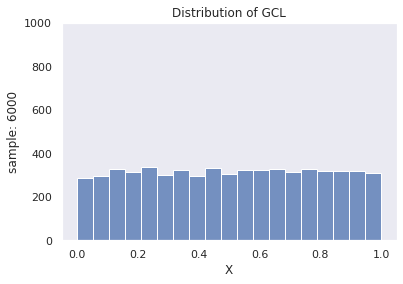

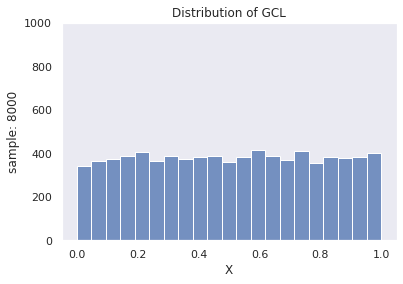

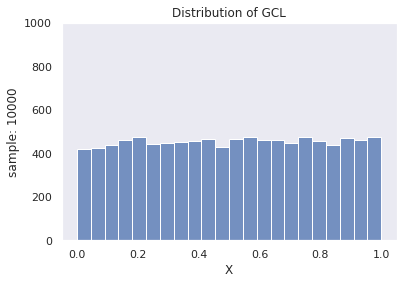

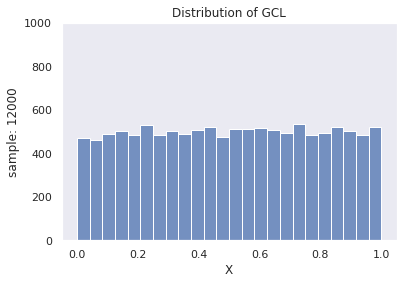

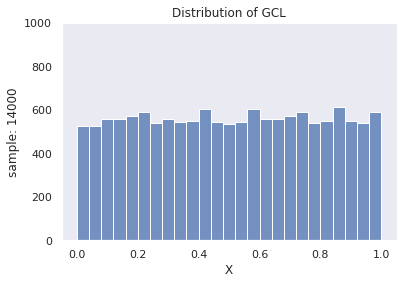

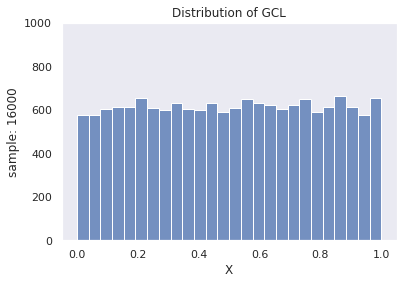

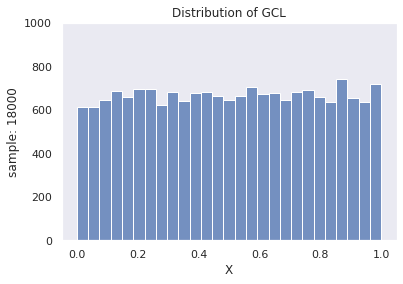

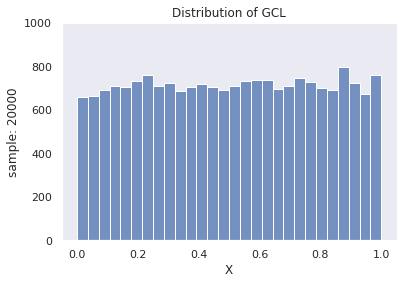

<Figure size 432x288 with 0 Axes>

In [106]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imageio

def plot_for_offset(power, y_max):
    # Data for plotting
    s = generarRandomNormalizada(power)

    ax = sns.histplot(s)
    ax.grid()
    ax.set(xlabel='X', ylabel='sample: {}'.format(power),
           title='Distribution of GCL')
    fig = ax.figure
    # IMPORTANT ANIMATION CODE HERE
    # Used to keep the limits constant
    ax.set_ylim(0, y_max)

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.figure()
    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('./powers.gif', [plot_for_offset(2000*(i+1), 1000) for i in range(10)], fps=1)

# Ejercicio 2

## Ejercicio 2.1

Vamos a utilizar nuestro generador para obtener numeros del 0 al 9 con nuestro gerador de numeros normalizados.

In [51]:
N = generarRandomNormalizada(12876)

numGenerados = []

for j in range(9,-1,-1):
    numGenerados.append(0)

for i in N:
    for j in range(9,-1,-1):
        if i < 1/(j+1):
            numGenerados[j] += 1
            break

print("Tamaño de los numeros generados: " + str(sum(numGenerados)))

Tamaño de los numeros generados: 12876


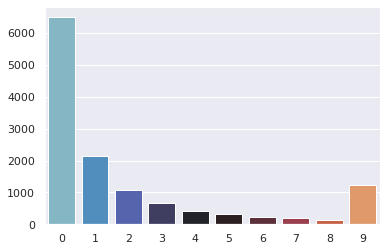

In [42]:
numSimulados = list(range(0,10))

ax = sns.barplot(x=numSimulados, y=numGenerados, palette='icefire')

No podemos decir que es una distribucion uniforme, pero realizamos un test con esta muestra para confirmarlo. Entonces vamos a hacer un test para ver si es realmente uniforme o no.

Entonces vamos a definir un test para ver si la distribucion es uniforme. Donde la hipotesis nula seria que p = 1/10.


In [43]:
from scipy.stats import chi2

print("Hipótesis nula: La distribucion es uniforme")

lanzamientos = sum(numGenerados)
frecuencia = 1/len(numGenerados)
gradosDeLibertad = len(numGenerados) - 1

D2 = sum([(fO - frecuencia*lanzamientos)**2 for fO in numGenerados])/(frecuencia*lanzamientos)

limiteSuperior = chi2.ppf(0.95, df = gradosDeLibertad )

print("Estadistico: {:.2f} ".format(D2))

print("Limite: {:.2f}".format(limiteSuperior))

if D2 <= limiteSuperior:
  print("El test acepta la hipotesis nula.")

else:
  print("El test rechaza la hipótesis nula")


Hipótesis nula: La distribucion es uniforme
Estadistico: 26141.11 
Limite: 16.92
El test rechaza la hipótesis nula


Como vemos se rechaza la hipotesis nula, entonces podemos decir que no es uniforme. 

## Ejercicio 2.2

Vamos a ver un otro ejemplo, generando numeros de 0 a 9 pero determinandolos de otra manera.

In [44]:
""" Generar numeros de 0 a 9 """

N = generarRandom(12876)

numGenerados = []

for j in range(9,-1,-1):
    numGenerados.append(0)

for i in N:
    numGenerados[ int( i % len(numGenerados) ) ] += 1

print("Tamaño de los numeros generados: " + str(sum(numGenerados)))

Tamaño de los numeros generados: 12876


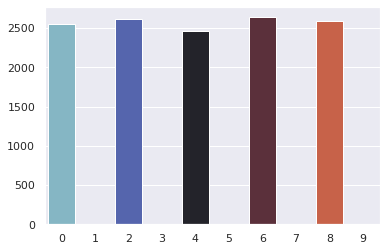

In [45]:
numSimulados = list(range(0,10))

ax = sns.barplot(x=numSimulados, y=numGenerados, palette='icefire')

En un principio no podemos decir que no es una distribucion uniforme, pero podemos confirmarlo. Entonces vamos a hacer un test para ver si es realmente uniforme o no.

Entonces vamos a definir un test para ver si la distribucion es uniforme. Donde la hipotesis nula seria que p = 1/10.


In [46]:
from scipy.stats import chi2

print("Hipótesis nula: La distribucion es uniforme")

lanzamientos = sum(numGenerados)
frecuencia = 1/len(numGenerados)
gradosDeLibertad = len(numGenerados) - 1

D2 = sum([(fO - frecuencia*lanzamientos)**2 for fO in numGenerados])/(frecuencia*lanzamientos)

limiteSuperior = chi2.ppf(0.95, df = gradosDeLibertad )

print("Estadistico: {:.2f} ".format(D2))

print("Limite: {:.2f}".format(limiteSuperior))

if D2 <= limiteSuperior:
  print("El test acepta la hipotesis nula.")

else:
  print("El test rechaza la hipótesis nula")


Hipótesis nula: La distribucion es uniforme
Estadistico: 12786.18 
Limite: 16.92
El test rechaza la hipótesis nula


## Ejercicio 2.3

Vamos a simular una moneda con cara o seca, para ver si nuestro GCL distribuye bien las probabilidades

In [47]:
N = generarRandom(12876)

numGenerados = []

for j in range(0,2):
    numGenerados.append(0)

for i in N:
    if i < modulo/2:
        numGenerados[0] += 1
    else:
        numGenerados[1] += 1

print("Tamaño de los numeros generados: " + str(sum(numGenerados)))

Tamaño de los numeros generados: 12876


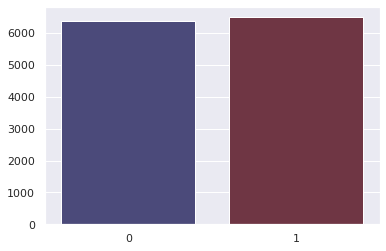

In [48]:
numSimulados = list(range(0,2))

ax = sns.barplot(x=numSimulados, y=numGenerados, palette='icefire')

In [49]:
print("Hipótesis nula: La distribucion es uniforme")

lanzamientos = sum(numGenerados)
frecuencia = 1/len(numGenerados)
gradosDeLibertad = len(numGenerados) - 1

D2 = sum([(fO - frecuencia*lanzamientos)**2 for fO in numGenerados])/(frecuencia*lanzamientos)

limiteSuperior = chi2.ppf(0.95, df = gradosDeLibertad )

print("Estadistico: {:.2f} ".format(D2))

print("Limite: {:.2f}".format(limiteSuperior))

if D2 <= limiteSuperior:
  print("El test acepta la hipotesis nula.")

else:
  print("El test rechaza la hipótesis nula")


Hipótesis nula: La distribucion es uniforme
Estadistico: 1.16 
Limite: 3.84
El test acepta la hipotesis nula.


# Ejercicio 3